# Overview
### Use multiple linear regression to predict salary from all the variables in the dataset.
### In the next series of challenges, we will predict employee salaries from different employee characteristics (or features).
### Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in the metadata. Answer the following questions:


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as lr
from sklearn import preprocessing
from IPython.display import display
from yellowbrick.regressor import ResidualsPlot

### Clean data
##### We will use the method .info() to check the details of the dataset, and figure out which columns has missing values.

In [25]:
data = pd.read_csv('salary.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


### Missing values
#### the method obave shows that there are missing values on salary.
#### we can locate it for clearity and decide what we can do with the outcome.
###### I have made some conclusions on these incounters which are:
1. drop the rows with the missing values if the number of dropped values is less than 15%.
2. If it is indeed more than 15% I can Replace the values with one or zero.

##### N.B. The obove concussion will must work only if the column is important for your finding/research if not the drop the column and continue 


In [26]:
data.loc[data['salary'].isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [27]:
data = data.drop([208])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        513 non-null int64
yearsworked    513 non-null int64
yearsrank      513 non-null int64
market         513 non-null float64
degree         513 non-null int64
otherqual      513 non-null int64
position       513 non-null int64
male           513 non-null int64
Field          513 non-null int64
yearsabs       513 non-null int64
dtypes: float64(2), int64(9)
memory usage: 48.1 KB


In [28]:
# Create scatterplots, histograms, and a descriptive statistics table of the variables of interest.
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


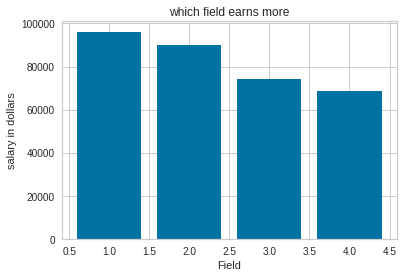

In [29]:
# plot a bar graph showing wich field code is earning more.
y = data['salary']
x = data['Field']

plt.title("which field earns more")
plt.xlabel('Field')
plt.ylabel('salary in dollars')
plt.bar(x,y)
plt.show()

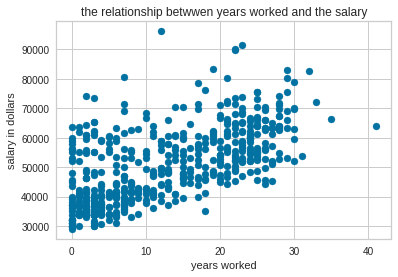

In [30]:
# does years worked really define the salary of an individual
y = data['salary']
x = data['yearsworked']

plt.title("the relationship betwwen years worked and the salary")
plt.xlabel('years worked')
plt.ylabel('salary in dollars')
plt.scatter(x,y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f805136a0>]],
      dtype=object)

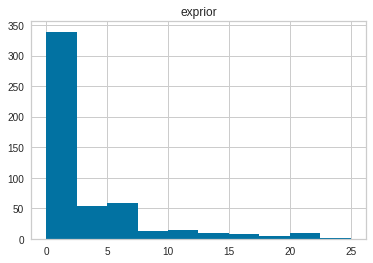

In [31]:
sal = data.groupby('exprior').size() .reset_index(name='salary')
data.hist(column = "exprior")

/home/singita/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


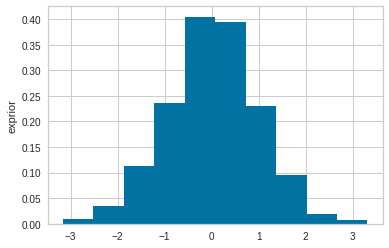

In [32]:
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=10)
plt.ylabel('exprior');

In [33]:
# Recode the variable Field into three dummy variables, using HR as the reference category.
# we are gonna make dummies values for and alocate it to a new dataframe
dummies = pd.get_dummies(data.Field)
dummies.head()

,1,2,3,4
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


### Encoding
* we will merge our original dataset with the new dataset.

In [34]:
dummies = dummies.rename(columns={1 : 'Engineering', 2 : 'Finance', 3 : 'Human Resources', 4 : 'Marketing'})
dummies.head()

,Engineering,Finance,Human Resources,Marketing
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [35]:
merge = pd.concat([data,dummies],axis='columns')
merge.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1


In [36]:
col = merge[['Human Resources','Field']]
merge = merge.drop(columns=col)

In [37]:
merge.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Engineering,Finance,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,0,0,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,0,0,1,0
2,45500.0,0,0,0,1.21,1,0,1,1,2,0,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,1


In [56]:
#predictor model and target
model = lr()

X = merge[['yearsworked','exprior','market','Engineering','Finance','Marketing','male']]

Y = merge[['salary']]

#fit model
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
#  Produce a correlation matrix comparing the relationship of salary to the predictor variables. 
# Is there any multicollinearity or other problems that may be a problem in the multiple regression?

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

#get predicted y values
predictions = lm.predict(X)

#get R squared
print(lm.score(X,y),"%")

0.7412304118971285 %


In [62]:
#intercepts
print(lm.intercept_)

3086.435614060698


In [64]:
# Run the multiple linear regression and interpret the correlation coefficients. 
#What are the most important features when predicting employee salary?

#see regression coefficients
print(lm.coef_)

[  825.23369498   706.86938443 31846.60067285  7754.48061906
  5481.21257499   797.20875637  1922.07804171]


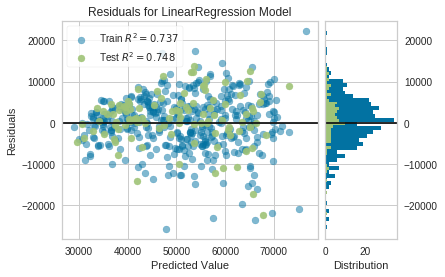

In [79]:
# Plot the standardised residuals versus the standardised predicted values. 
#Are there any problems with the regression?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [19]:
# Get and interpret the partial coefficients and tolerance values for the regression model. 
#Are there any problems with this model?
